In [4]:
import argparse
from pathlib import Path
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole


In [5]:
import pandas as pd
from tqdm import tqdm
import prolif as plf
import MDAnalysis as mda
from MDAnalysis.topology.guessers import guess_types
from pathlib import Path

In [6]:
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets


In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

In [69]:
IPythonConsole.ipython_useSVG = True

# Initialize progress bar for pandas
tqdm.pandas()

In [70]:
final_results_df = pd.read_csv('processed/processed.csv')
final_results_df.shape

(34107, 13)

In [71]:
final_results_df.head()

,Residue,Hydrophobic.distance,VdWContact.distance,HBDonor.distance,HBDonor.DHA_angle,Cationic.distance,HBAcceptor.distance,HBAcceptor.DHA_angle,PiStacking.distance,PiStacking.plane_angle,PiStacking.normal_to_centroid_angle,PiStacking.intersect_distance,PDB_File
0,VAL60.A,4.475821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,ASP61.A,NaN,3.103711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,PHE64.A,4.006420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,PHE64.A,NaN,3.348581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,PHE64.A,4.006420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [72]:
final_results_df['PDB_File'].nunique()

500

Other parameters to be calculated from the time series. 

For each frame, calculate stats E.g. mean of Hydrophpic distance etc.

- Seasonality measures
- ACF and PACF 
- Stationarity test - may also be useful. Shows whether the property is evolving or not.

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## Time series of Mean values of each property

In [74]:
final_results_df.groupby('PDB_File')['Hydrophobic.distance'].mean()

PDB_File
0      4.158671
1      4.138941
2      4.194190
3      4.205684
4      4.291790
         ...   
496    4.240571
497    4.281066
498    4.328069
499    4.266598
500    4.242091
Name: Hydrophobic.distance, Length: 500, dtype: float64

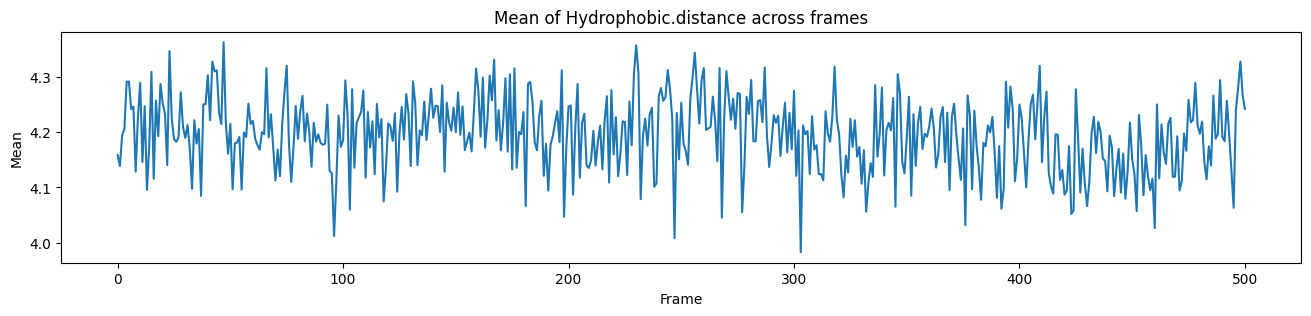

In [75]:
plt.figure(figsize=(16, 3))
plt.xlabel('Frame')
plt.ylabel('Mean')    
plt.title(f'Mean of Hydrophobic.distance across frames')
plt.plot(final_results_df.groupby('PDB_File')['Hydrophobic.distance'].mean())

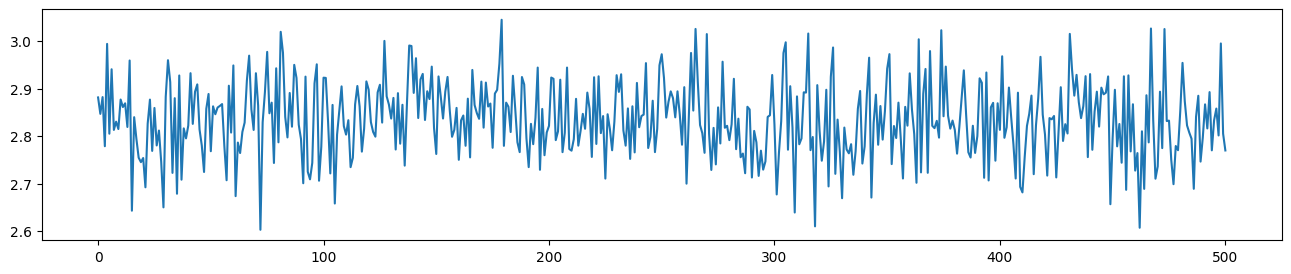

In [76]:
# Hydrophobic.distance	VdWContact.distance	HBDonor.distance	HBDonor.DHA_angle	Cationic.distance	HBAcceptor.distance	HBAcceptor.DHA_angle	PiStacking.distance	PiStacking.plane_angle	PiStacking.normal_to_centroid_angle	PiStacking.intersect_distance
plt.figure(figsize=(16, 3))
plt.plot(final_results_df.groupby('PDB_File')['VdWContact.distance'].mean())

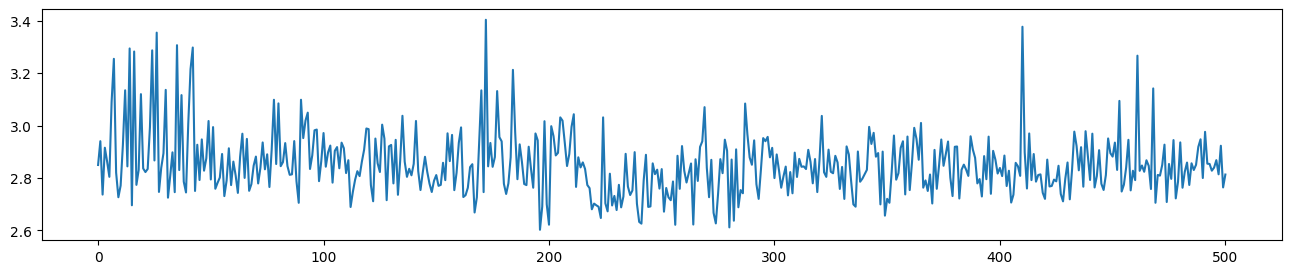

In [77]:
# Hydrophobic.distance	VdWContact.distance	HBDonor.distance	HBDonor.DHA_angle	Cationic.distance	HBAcceptor.distance	HBAcceptor.DHA_angle	PiStacking.distance	PiStacking.plane_angle	PiStacking.normal_to_centroid_angle	PiStacking.intersect_distance
plt.figure(figsize=(16, 3))
plt.plot(final_results_df.groupby('PDB_File')['HBDonor.distance'].mean())

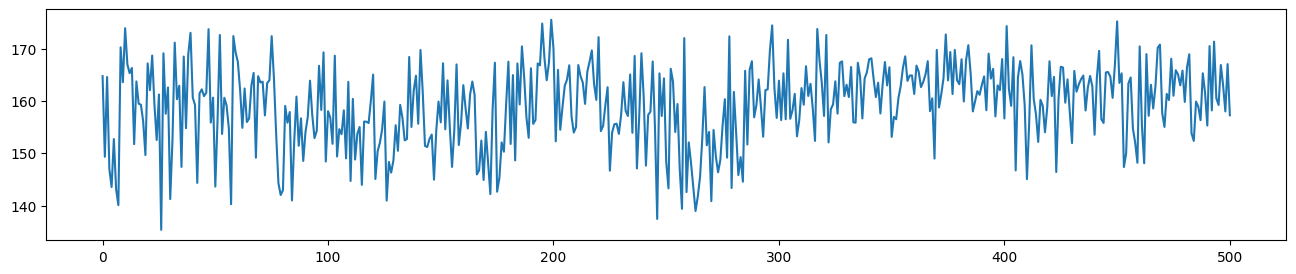

In [78]:
# Hydrophobic.distance	VdWContact.distance	HBDonor.distance	HBDonor.DHA_angle	Cationic.distance	HBAcceptor.distance	HBAcceptor.DHA_angle	PiStacking.distance	PiStacking.plane_angle	PiStacking.normal_to_centroid_angle	PiStacking.intersect_distance
plt.figure(figsize=(16, 3))
plt.plot(final_results_df.groupby('PDB_File')['HBDonor.DHA_angle'].mean())

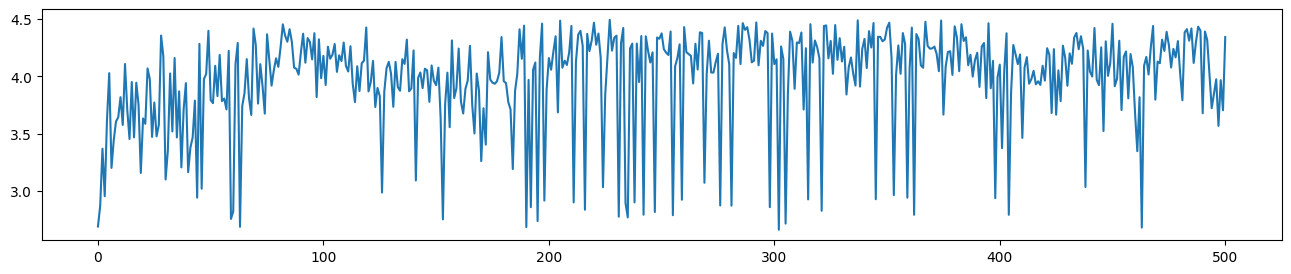

In [79]:
# Hydrophobic.distance	VdWContact.distance	HBDonor.distance	HBDonor.DHA_angle	Cationic.distance	HBAcceptor.distance	HBAcceptor.DHA_angle	PiStacking.distance	PiStacking.plane_angle	PiStacking.normal_to_centroid_angle	PiStacking.intersect_distance
plt.figure(figsize=(16, 3))
plt.plot(final_results_df.groupby('PDB_File')['Cationic.distance'].mean())

In [80]:
columns_to_group = [col for col in final_results_df.columns if col not in ['Residue', 'PDB_File', 'PiStacking.intersect_distance']]
mean_ts = final_results_df.groupby('PDB_File')[columns_to_group].mean()
mean_ts

,Hydrophobic.distance,VdWContact.distance,HBDonor.distance,HBDonor.DHA_angle,Cationic.distance,HBAcceptor.distance,HBAcceptor.DHA_angle,PiStacking.distance,PiStacking.plane_angle,PiStacking.normal_to_centroid_angle
PDB_File,,,,,,,,,,
0,4.158671,2.881685,2.849605,164.721847,2.687845,2.976997,139.267214,4.544977,36.416105,17.011641
1,4.138941,2.847108,2.940352,149.326713,2.871689,2.874542,140.708845,4.762738,47.816779,19.781233
2,4.194190,2.882431,2.736678,164.566612,3.367998,2.913569,151.489963,3.650355,9.892147,22.674719
3,4.205684,2.778934,2.915441,146.999311,2.952610,3.059980,146.629624,3.618223,11.464225,24.271337
4,4.291790,2.994458,2.863059,143.550722,3.619478,2.900293,168.469855,3.660098,13.571072,22.081285
...,...,...,...,...,...,...,...,...,...,...
496,4.240571,2.858222,2.867999,166.849530,3.974744,3.246548,153.445956,3.925237,12.431945,24.911733
497,4.281066,2.801651,2.814042,162.977558,3.567381,2.803069,159.509914,3.905568,11.083403,23.927779
498,4.328069,2.995376,2.922955,157.989347,3.966772,3.015446,169.150756,5.043564,62.676932,93.329944


In [81]:
# for col in mean_ts.columns:
#     print(len(mean_ts[col]))

print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      mean_ts.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Hydrophobic.distance                   0
VdWContact.distance                    0
HBDonor.distance                       0
HBDonor.DHA_angle                      0
Cationic.distance                      0
HBAcceptor.distance                    9
HBAcceptor.DHA_angle                   9
PiStacking.distance                    6
PiStacking.plane_angle                 6
PiStacking.normal_to_centroid_angle    6
dtype: int64


## ACF AND PACF for each time series 

In [82]:
import plotly.graph_objs as go
from statsmodels.tsa.stattools import acf, pacf


In [83]:
def plot_acf_pacf(mean_ts, lags=40):
    # Prepare traces for ACF and PACF
    acf_traces = []
    pacf_traces = []

    # Loop through each column in mean_ts to calculate ACF and PACF
    for col in mean_ts.columns:
        ts_values = mean_ts[col].dropna()
        
        # Dynamically adjust the number of lags based on the series length
        max_lags = min(lags, len(ts_values) // 2 - 1)
        if max_lags < 1:
            print(f"Not enough data points for column '{col}' to compute ACF/PACF.")
            continue
        
        # Compute ACF and PACF
        acf_values = acf(ts_values, nlags=max_lags)
        pacf_values = pacf(ts_values, nlags=max_lags)
        
        # Create traces for ACF
        acf_trace = go.Scatter(
            x=np.arange(len(acf_values)),
            y=acf_values,
            mode='lines+markers',
            name=f'{col} ACF',
            visible='legendonly'  # Hide initially, let user select from legend
        )
        acf_traces.append(acf_trace)

        # Create traces for PACF
        pacf_trace = go.Scatter(
            x=np.arange(len(pacf_values)),
            y=pacf_values,
            mode='lines+markers',
            name=f'{col} PACF',
            visible='legendonly'  # Hide initially, let user select from legend
        )
        pacf_traces.append(pacf_trace)

    # Create ACF plot with all traces
    acf_fig = go.Figure(data=acf_traces)
    acf_fig.update_layout(
        title='ACF for Each Time Series',
        xaxis_title='Lags',
        yaxis_title='ACF Value',
        legend_title='Columns'
    )
    
    # Create PACF plot with all traces
    pacf_fig = go.Figure(data=pacf_traces)
    pacf_fig.update_layout(
        title='PACF for Each Time Series',
        xaxis_title='Lags',
        yaxis_title='PACF Value',
        legend_title='Columns'
    )
    
    
    acf_fig.show()
    pacf_fig.show()


plot_acf_pacf(mean_ts)

**Since there are no spikes after the 1st lag, there does not seem to be much correlation between the previous lags.**

## Seasonal decomposition

Breaks down the time series into three components:
- Trend: The long-term direction in the data (upward, downward, or flat).
- Seasonal: Regular and repeating short-term cycles or patterns (e.g., quarterly sales spikes).
- Residual: The remaining irregular or random noise after removing the trend and seasonal components.


In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [85]:
def plot_seasonal_decomposition(mean_ts, model='additive', freq=None):
    # Prepare traces for trend, seasonal, and residual
    trend_traces = []
    seasonal_traces = []
    residual_traces = []
    observed_traces = []

    # Loop through each column in mean_ts to decompose and plot
    for col in mean_ts.columns:
        ts_values = mean_ts[col].dropna()

        # Perform seasonal decomposition
        decomposition = seasonal_decompose(ts_values, model=model, period=freq)
        
        # Create traces for trend, seasonal, residual, and observed
        trend_trace = go.Scatter(
            x=ts_values.index,
            y=decomposition.trend,
            mode='lines',
            name=f'{col} Trend',
            visible='legendonly'  # Hide initially, let user select from legend
        )
        trend_traces.append(trend_trace)

        seasonal_trace = go.Scatter(
            x=ts_values.index,
            y=decomposition.seasonal,
            mode='lines',
            name=f'{col} Seasonal',
            visible='legendonly'
        )
        seasonal_traces.append(seasonal_trace)

        residual_trace = go.Scatter(
            x=ts_values.index,
            y=decomposition.resid,
            mode='lines',
            name=f'{col} Residual',
            visible='legendonly'
        )
        residual_traces.append(residual_trace)

        observed_trace = go.Scatter(
            x=ts_values.index,
            y=decomposition.observed,
            mode='lines',
            name=f'{col} Observed',
            visible='legendonly'
        )
        observed_traces.append(observed_trace)

    # Create a figure for each component
    trend_fig = go.Figure(data=trend_traces)
    trend_fig.update_layout(
        title='Trend Component for Each Time Series',
        xaxis_title='Time',
        yaxis_title='Trend',
        legend_title='Columns'
    )

    seasonal_fig = go.Figure(data=seasonal_traces)
    seasonal_fig.update_layout(
        title='Seasonal Component for Each Time Series',
        xaxis_title='Time',
        yaxis_title='Seasonal',
        legend_title='Columns'
    )

    residual_fig = go.Figure(data=residual_traces)
    residual_fig.update_layout(
        title='Residual Component for Each Time Series',
        xaxis_title='Time',
        yaxis_title='Residual',
        legend_title='Columns'
    )

    observed_fig = go.Figure(data=observed_traces)
    observed_fig.update_layout(
        title='Observed Values for Each Time Series',
        xaxis_title='Time',
        yaxis_title='Observed',
        legend_title='Columns'
    )

    # Display the figures
    trend_fig.show()
    seasonal_fig.show()
    residual_fig.show()
    observed_fig.show()



In [98]:
#  `freq` can be adjusted based on any periodicity in the data (e.g., 12 for monthly data if there's a yearly seasonality) - but in this case let's try 17 since there are 500 "time stamps"
plot_seasonal_decomposition(mean_ts, model='additive', freq=40)

Observations:
- The trend component shows that overall the time series has both upward and downward movements
- The seasonal component shows that there are recurring patterns at **up to to around 30 frames** with some frames showing a clear pattern than others.
- The residual component shows that there are also anomalies and unexpected changes at some points

## Stationarity Test 

Checks whether the statistical properties (mean, variance, and autocorrelation) of a time series remain constant over time.


In [87]:
from statsmodels.tsa.stattools import adfuller 

In [92]:
#Perform Dickey-Fuller test:
def test_stationarity(timeseries):    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): # key, value mapping
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

p-value below  0.05  indicates that you can reject the null hypothesis and that the series is stationary.

In [93]:
stationarity_test = pd.DataFrame(columns=['Stationarity_Result'], index=mean_ts.columns)


In [94]:
#Perform Dickey-Fuller test:
def test_stationarity(timeseries):
    timeseries = pd.Series(timeseries).dropna()

    # Check if the time series is empty after dropping NaNs
    if len(timeseries) == 0:
        return "Insufficient Data"
        
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): # key, value mapping
        dfoutput['Critical Value (%s)'%key] = value
    #print(dfoutput)
    if dftest[0] < dftest[4]["5%"]:
        result = "Stationary"
    else:
         result = "Non-Stationary"
    return result

In [95]:
test_stationarity(mean_ts['Hydrophobic.distance'].values.tolist())

'Stationary'

In [96]:
for col in mean_ts.columns:
    stationarity_result = test_stationarity(mean_ts[col].values.tolist())
    stationarity_test.loc[col, 'Stationarity_Result'] = stationarity_result

stationarity_test

,Stationarity_Result
Hydrophobic.distance,Stationary
VdWContact.distance,Stationary
HBDonor.distance,Stationary
HBDonor.DHA_angle,Stationary
Cationic.distance,Stationary
HBAcceptor.distance,Stationary
HBAcceptor.DHA_angle,Stationary
PiStacking.distance,Stationary
PiStacking.plane_angle,Stationary
PiStacking.normal_to_centroid_angle,Stationary


All the measures are stationary. Their mean, variance and autocorrelation are constant over time.   

# Testing other metrics from MDAnalysis

## RMSD

In [1]:
from MDAnalysis.analysis import rms
import glob
import os

In [2]:
def calculate_rmsd_time_series(reference_pdb_path, pdb_folder_path):
    """
    Calculate the RMSD time series for a set of PDB files relative to a reference structure.
    
    Parameters:
    - reference_pdb_path: Path to the reference PDB file.
    - pdb_folder_path: Path to the folder containing PDB files for time series analysis.
    
    Returns:
    - time_series: A list of RMSD values.
    - pdb_files: A list of PDB file names corresponding to each RMSD value.
    """
    # Load the reference structure
    reference = mda.Universe(reference_pdb_path)

    # Get a list of PDB files sorted by their numerical order (if applicable)
    pdb_files = sorted(glob.glob(os.path.join(pdb_folder_path, "*.pdb")))

    rmsd_values = []

    # Iterate through each PDB file and calculate RMSD
    for pdb_file in pdb_files:
        # Load the current structure
        current_structure = mda.Universe(pdb_file)
        
        # Align the structures and calculate RMSD
        rmsd_calculation = rms.rmsd(
            current_structure.atoms.positions,
            reference.atoms.positions,
            center=True,  # Center structures before calculation
            superposition=True  # Align structures before calculation
        )
        
        rmsd_values.append(rmsd_calculation)
    
    return rmsd_values, pdb_files

In [8]:
# Example usage:
reference_pdb = "/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/tmp_0.pdb"
pdb_folder = "/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/frames/"

rmsd_values, pdb_files = calculate_rmsd_time_series(reference_pdb, pdb_folder)

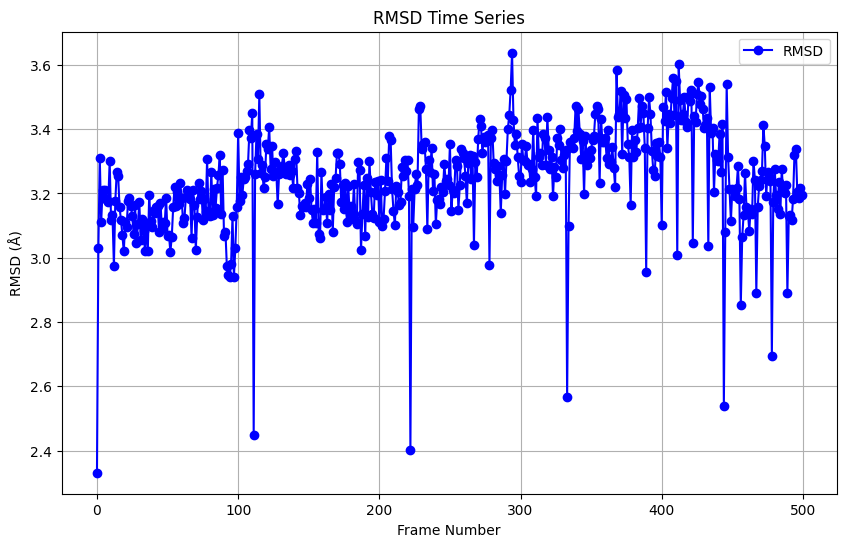

In [9]:
# Plotting the RMSD time series
plt.figure(figsize=(10, 6))
plt.plot(rmsd_values, marker='o', linestyle='-', color='b', label='RMSD')
plt.xlabel('Frame Number')
plt.ylabel('RMSD (Å)')
plt.title('RMSD Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from MDAnalysis.analysis.rms import RMSF

def calculate_rmsf(reference_pdb_path, pdb_folder_path):
    """
    Calculate the RMSF for each atom in a set of PDB files relative to a reference structure.
    
    Parameters:
    - reference_pdb_path: Path to the reference PDB file.
    - pdb_folder_path: Path to the folder containing PDB files for time series analysis.
    
    Returns:
    - rmsf_values: Array of RMSF values for each atom.
    """
    # Load the reference structure
    reference = mda.Universe(reference_pdb_path)
    
    # Load all frames from the PDB files into a trajectory object
    pdb_files = sorted(glob.glob(os.path.join(pdb_folder_path, "*.pdb")))
    trajectory = mda.Universe(pdb_files[0], pdb_files[1:])  # Load multiple frames as a trajectory

    # Calculate RMSF for all atoms
    rmsf = RMSF(trajectory.atoms).run()
    rmsf_values = rmsf.rmsf
    
    return rmsf_values

In [11]:
rmsf_values = calculate_rmsf(reference_pdb, pdb_folder)



/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/protein-ligand/.venv/lib/python3.11/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt
/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/protein-ligand/.venv/lib/python3.11/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/protein-ligand/.venv/lib/python3.11/site-packages/MDAnalysis/analysis/rms.py:887: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


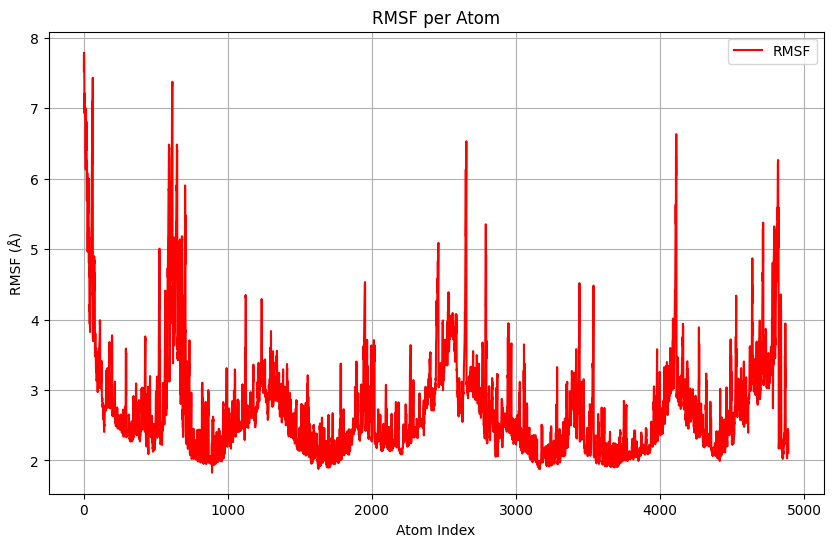

In [12]:
# Plotting RMSF
plt.figure(figsize=(10, 6))
plt.plot(rmsf_values, color='r', label='RMSF')
plt.xlabel('Atom Index')
plt.ylabel('RMSF (Å)')
plt.title('RMSF per Atom')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from MDAnalysis.analysis import radiusgyration

def calculate_rg_time_series(pdb_folder_path):
    """
    Calculate the Rg time series for a set of PDB files.
    
    Parameters:
    - pdb_folder_path: Path to the folder containing PDB files for time series analysis.
    
    Returns:
    - rg_values: List of Rg values.
    - pdb_files: List of PDB file names corresponding to each Rg value.
    """
    pdb_files = sorted(glob.glob(os.path.join(pdb_folder_path, "*.pdb")))
    rg_values = []

    # Iterate through each PDB file and calculate Rg
    for pdb_file in pdb_files:
        u = mda.Universe(pdb_file)
        rg = polymer.RadiusOfGyration(u.atoms).run()
        rg_values.append(rg.results.rg)
    
    return rg_values, pdb_files

ImportError: cannot import name 'radiusgyration' from 'MDAnalysis.analysis' (/Users/surajkwork/Documents/Projects/ProteinLigand/protein-ligand/protein-ligand/.venv/lib/python3.11/site-packages/MDAnalysis/analysis/__init__.py)

In [14]:
rg_values, pdb_files = calculate_rg_time_series(pdb_folder)

# Plotting the Rg time series
plt.figure(figsize=(10, 6))
plt.plot(rg_values, marker='o', linestyle='-', color='g', label='Radius of Gyration')
plt.xlabel('Frame Number')
plt.ylabel('Radius of Gyration (Å)')
plt.title('Rg Time Series')
plt.legend()
plt.grid(True)
plt.show()

AttributeError: module 'MDAnalysis.analysis.polymer' has no attribute 'RadiusOfGyration'

In [15]:
from MDAnalysis.analysis import hydrogenbonds

def calculate_hbond_time_series(pdb_folder_path, donor_sel='protein', acceptor_sel='protein'):
    """
    Calculate the hydrogen bond count time series for a set of PDB files.
    
    Parameters:
    - pdb_folder_path: Path to the folder containing PDB files for time series analysis.
    - donor_sel: Selection string for donor atoms (e.g., 'protein' or 'resname LIG')
    - acceptor_sel: Selection string for acceptor atoms (e.g., 'protein' or 'resname LIG')
    
    Returns:
    - hbond_counts: List of hydrogen bond counts for each frame.
    - pdb_files: List of PDB file names corresponding to each hydrogen bond count.
    """
    pdb_files = sorted(glob.glob(os.path.join(pdb_folder_path, "*.pdb")))
    hbond_counts = []

    for pdb_file in pdb_files:
        u = mda.Universe(pdb_file)
        
        # Calculate hydrogen bonds using the selected donor and acceptor atoms
        hbond_analysis = hydrogenbonds.HydrogenBondAnalysis(u, donors_sel=donor_sel, acceptors_sel=acceptor_sel)
        hbond_analysis.run()
        
        # Store the number of hydrogen bonds for the current frame
        hbond_counts.append(len(hbond_analysis.results.hbonds))
    
    return hbond_counts, pdb_files

In [16]:
hbond_counts, pdb_files = calculate_hbond_time_series(pdb_folder)

# Plotting the hydrogen bond count time series
plt.figure(figsize=(10, 6))
plt.plot(hbond_counts, marker='o', linestyle='-', color='m', label='Hydrogen Bonds')
plt.xlabel('Frame Number')
plt.ylabel('Number of Hydrogen Bonds')
plt.title('Hydrogen Bond Count Time Series')
plt.legend()
plt.grid(True)
plt.show()

NoDataError: This Universe does not contain charge information